> # **FINAL PROJECT OPTION 1**
> #### **DSAI 302 Spring 2024**


>**Name**: Ahmet Yusuf Öztürk
>
>**Student Number**: 2020205063

### **PART 1 - INTRODUCTİON**

In this final project, I will work on the dataset [Pima Indians Diabetes Databes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data).

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Data Dictionary:**

Variable    | Definition	Key | Values|
------------|-------------------|----------|
Pregnancies |Number of times pregnant|
Glucose	|Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure	    |Diastolic blood pressure (mm Hg)
SkinThickness|Triceps skin fold thickness (mm)|
Insulin	        |2-Hour serum insulin (mu U/ml)
BMI	    |Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction	    |Diabetes pedigree function
Age	    |Age (years)
Outcome	    |Class variable (0 or 1) | 0 = Healty , 1 = Diabet


**Who is Pima Indians ?**


"The Pima (or Akimel O'odham, also spelled Akimel O'otham, "River People", formerly known as Pima) are a group of Native Americans living in an area consisting of what is now central and southern Arizona. The majority population of the surviving two bands of the Akimel O'odham are based in two reservations: the Keli Akimel O'otham on the Gila River Indian Community (GRIC) and the On'k Akimel O'odham on the Salt River Pima-Maricopa Indian Community (SRPMIC)." Wikipedia

## **PART 2 - Data Preprocessing & Exploratory Data Analysis (EDA)**

Importing necessary libraries and fetching data from kaggle.

In [1]:
import os
from google.colab import  userdata
import zipfile

os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')

In [2]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

with zipfile.ZipFile('pima-indians-diabetes-database.zip', 'r') as zip_ref:
    zip_ref.extractall()

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 13.8MB/s]


Reading csv file and saving it into a Pandas Dataframe, and then to take general look at the data, displaying first 12 rows of the dataset.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('diabetes.csv')

df.head(12)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1

Getting more information about the Data Frame columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Displaying more descriptive statisctics about the numerical columns.

In [6]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Searching for null entries. After looking that, one observes that there may be missing datas but not in the null form.

In [7]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Creating age categories, so working on the dataset become easier.

In [8]:
df["Age Groups"] = pd.cut(df["Age"], bins = [20,30,55,82],labels= ["Young","Middle Aged","Aged"])

print(len(df[(df["Age Groups"]=="Aged")&(df["Insulin"]==0)]))

df.head(12)

37


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   

    DiabetesPedigreeFunction  Age  Outcome   Age Groups  
0                      0.627   50        1  Middle Aged  
1                      0.351   31        0  Middle Aged  
2                      0.672   32        1  Middle Aged  
3                      0.167   21        0        Young  
4                      2.288   33        1  Middle Aged  
5                      0.201   30        0        Young  
6                      0.248   26        1        Young  
7                      0.134   29        0        Young  
8                      0.158   53        1  Middle Aged  
9                      0.232   54        1  Middle Aged  
10                     0.191   30        0        Young  
11                     0.537   34        1  Middle Aged

Let's look at the distribution of age among people by plotting histogram plot.

In [9]:
sns.set_style("whitegrid")
plt.hist(df["Age"],bins= 20,linewidth = 1.3,edgecolor = "black",color="#09acd9")

plt.title("Distribuion of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

We can't find missing values in this data set with former techniques, since the missing values are written 0 instead of NaN. So let's convert them into NaN.

In [10]:
df[['Glucose','BloodPressure','SkinThickness','Insulin',
      'BMI']] = df[['Glucose','BloodPressure','SkinThickness',
                      'Insulin','BMI']].replace(0,np.NaN)

In [11]:
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Age Groups                    0
dtype: int64


Let's look at the where are that missing values.

<ipython-input-12-80f5779f67f8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=combined.index, y='Count', data=combined, palette='coolwarm', edgecolor='black')


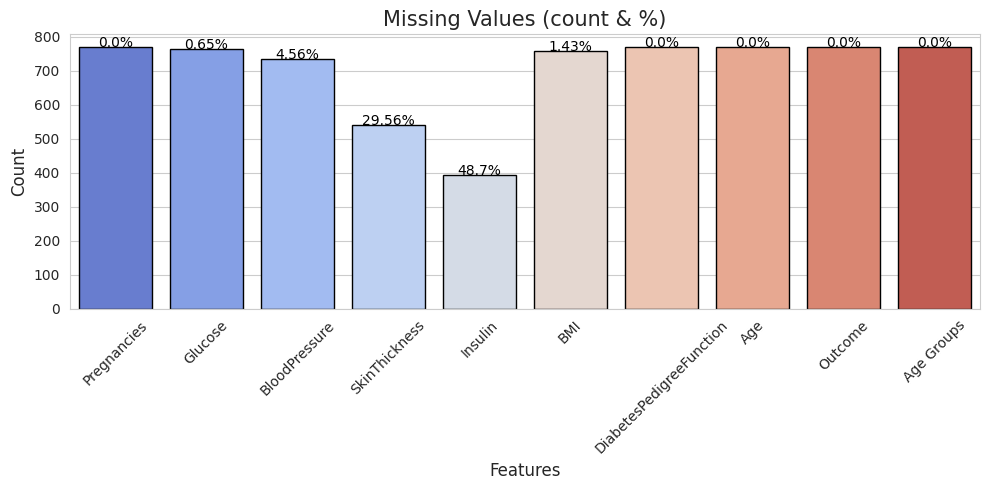

In [12]:
def missing_plot(dataset, key):
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns=['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum())) / len(dataset[key]) * 100, columns=['Count'])
    percentage_null = percentage_null.round(2)

    combined = null_feat.join(percentage_null, rsuffix='_percentage')

    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x=combined.index, y='Count', data=combined, palette='coolwarm', edgecolor='black')

    for i, value in enumerate(combined['Count_percentage']):
        ax.text(i, combined['Count'].iloc[i], f'{value}%', color='black', ha="center")

    ax.set_title('Missing Values (count & %)', fontsize=15)
    ax.set_xlabel('Features', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

missing_plot(df, 'Outcome')

In the very early stages of that assignment I tried to handle the missing values with `.mean()` method. But then I encountered a method that works better. Firstly let's define `median_outcome()` function as below. This function firstly create a Data Frame (`temp`) without any missing values on the `clmn` column. Then grouping `temp` wrt `Outcome` and `clmn`. An example of output is below.

In [13]:
def median_outcome(clmn):
    temp = df[df[clmn].notnull()]
    grpd_temp = temp[[clmn, 'Outcome']].groupby(['Outcome'])[[clmn]].median().reset_index()
    return grpd_temp

median_outcome("BMI")

Outcome   BMI
0        0  30.1
1        1  34.3

Now we are ready to handle the missing values. With `median_outcome()` function. We are going to replace missing values with 2 value. If the person who has missing values is diabetes, we are going to replace her missing values with median of that column who has diabetes. And vice versa.

In [14]:
for i in ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]:
  df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_outcome(i)[i][0]
  df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_outcome(i)[i][1]

print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age Groups                  0
dtype: int64


We check duplicated rows and see there is none.

In [15]:
duplicated_rows = df[df.duplicated()]
duplicated_rows

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome, Age Groups]
Index: []

By plotting box plotes, we are trying to understand outliers.

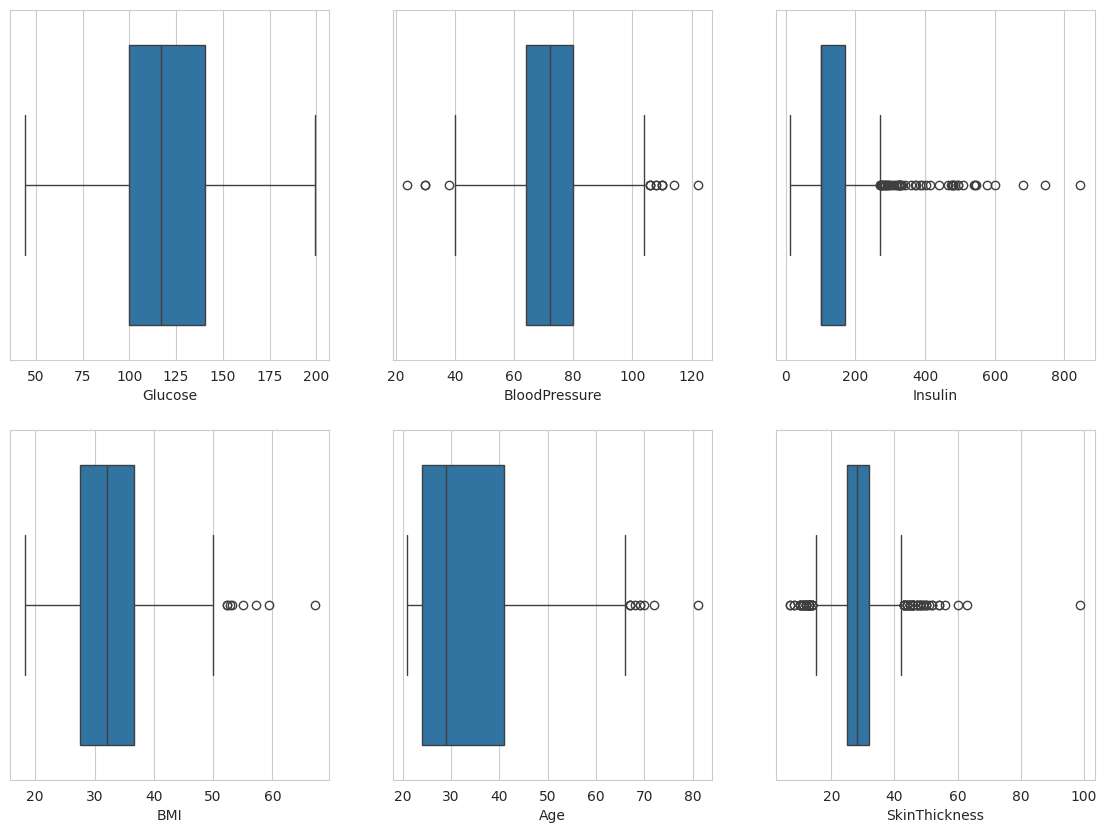

In [16]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.show()

In [17]:
df_updated = df

There is no significant outliers in Glucose and Age column, For Skin Thickness and Blood Pressure and BMI column there are apperent outliers. I am going to remove them. And for Insulin column I will remove the ones that is higher than 500 U/ml per serum.

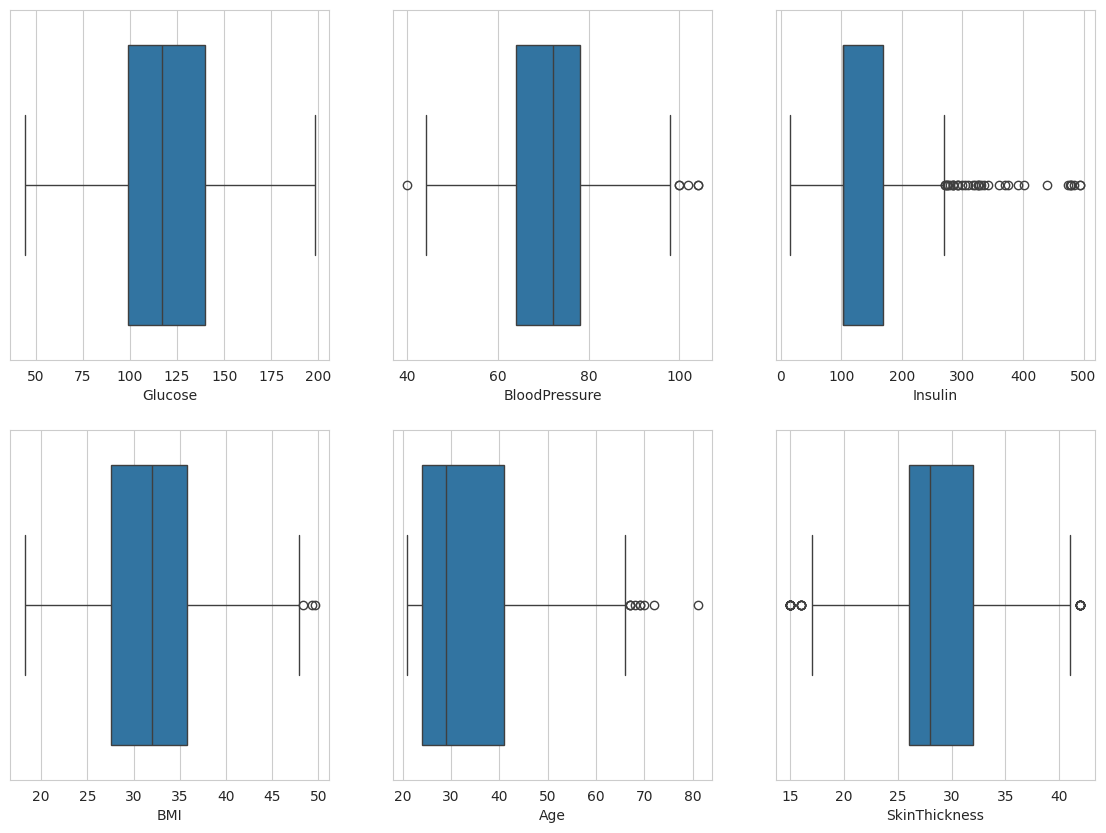

In [18]:
def find_outliers(i):
  q1 = df_updated[i].quantile(0.25)
  q3 = df_updated[i].quantile(0.75)
  inter_q = q3-q1
  up_bound = q3+inter_q*1.5
  low_bound = q1-inter_q*1.5
  outliers = df_updated[(df_updated[i]>up_bound) | (df_updated[i]<low_bound)]
  return outliers

for i in ["BloodPressure","BMI","SkinThickness"]:
  outliers_i = find_outliers(i)
  indices_to_drop = outliers_i.index
  df_updated = df_updated.drop(indices_to_drop)

df_updated = df_updated[df_updated["Insulin"]<500]

plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=df_updated)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=df_updated)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=df_updated)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=df_updated)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=df_updated)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=df_updated)
plt.show()

Let's draw a correleation plot.

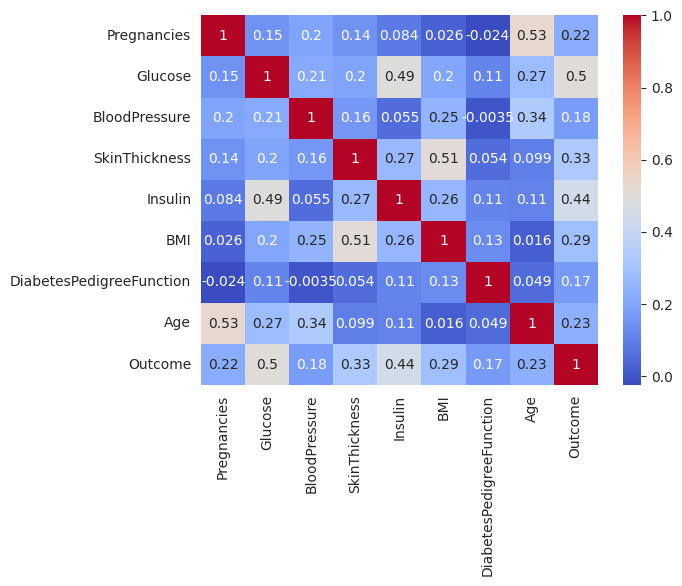

In [19]:
sns.heatmap(df_updated.select_dtypes(["float","int"]).corr(),annot=True,cmap="coolwarm")
plt.show()

To gaining general knowledge about distribution of BMI, We are to plot histplot.

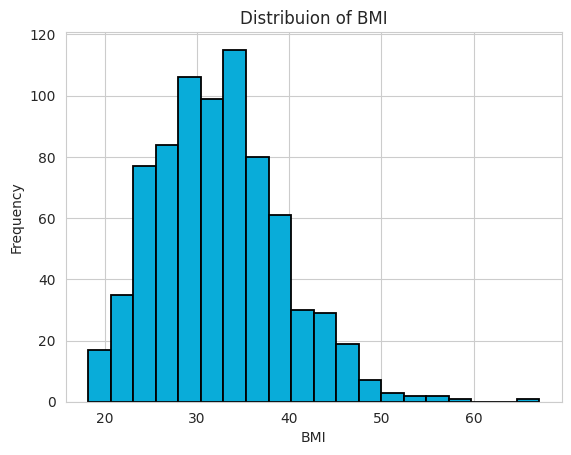

In [20]:
sns.set_style("whitegrid")
plt.hist(df["BMI"],bins= 20,linewidth = 1.3,edgecolor = "black",color="#09acd9")

plt.title("Distribuion of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")

plt.show()

Create a categorical data to work easily.

In [21]:
df_updated["BMI Categories"] = pd.cut(df_updated["BMI"], bins = [0,18.5,24.9,29.9,100],labels= ["Underweight","Healty Weight","Overweight","Obesity"])
df_updated["Blood Pressure Cat"] = pd.cut(df_updated["BloodPressure"], bins = [0,60,80,90,1000],labels= ["low","low mid","high mid","high"])

Draw several plots to observe some realtions between BMI and Blood pressure and other columns. For example as blood pressure go up the risk of being diabetic is significantly higher.

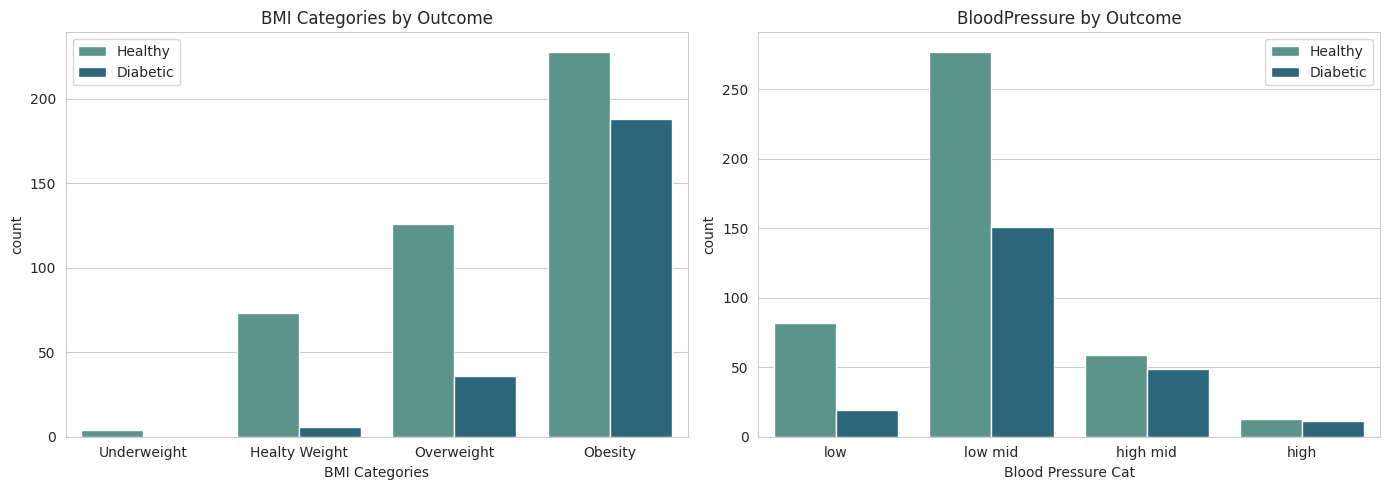

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# First subplot for 'BMI Categories'
sns.countplot(data=df_updated, x='BMI Categories', hue='Outcome', palette='crest', ax=ax[0])
ax[0].legend(['Healthy', 'Diabetic'])
ax[0].set_title('BMI Categories by Outcome')

# Second subplot for 'BloodPressure'
sns.countplot(data=df_updated, x='Blood Pressure Cat', hue='Outcome', palette='crest', ax=ax[1])
ax[1].legend(['Healthy', 'Diabetic'])
ax[1].set_title('BloodPressure by Outcome')

plt.tight_layout()
plt.show()


Let's investigate relation between BMI and Blood Pressure.

<Axes: xlabel='BMI', ylabel='BloodPressure'>

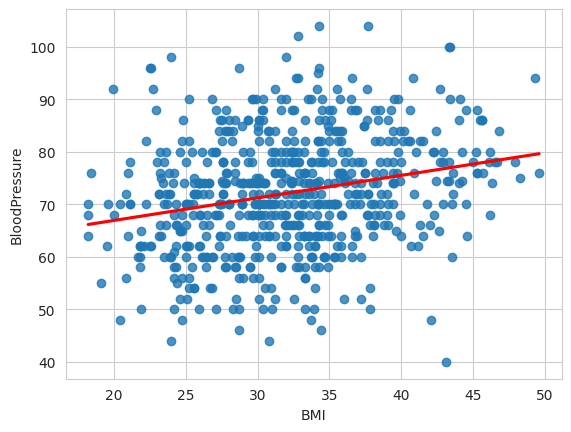

In [23]:
sns.regplot(df_updated,x="BMI", y= "BloodPressure",line_kws={"color":"red"},ci=False)

Draw several catplots to investigate between BMI Categories and other columns.

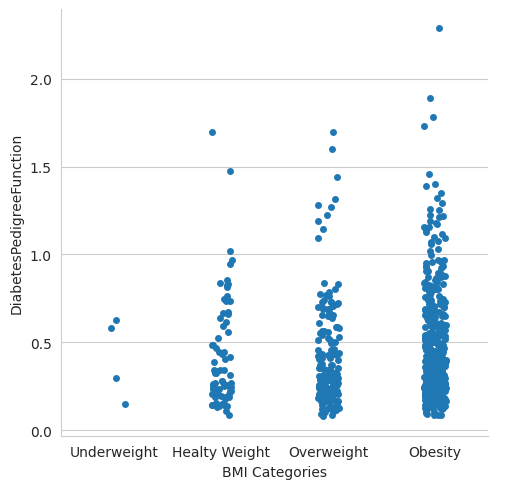

In [24]:
sns.catplot(df_updated,x="BMI Categories", y="DiabetesPedigreeFunction")
plt.show()

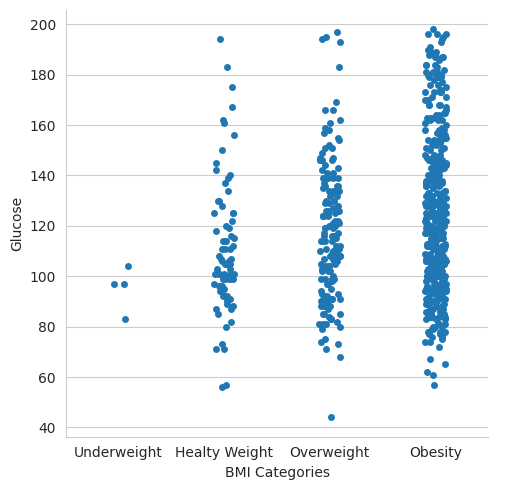

In [25]:
sns.catplot(df_updated,x="BMI Categories", y="Glucose")
plt.show()

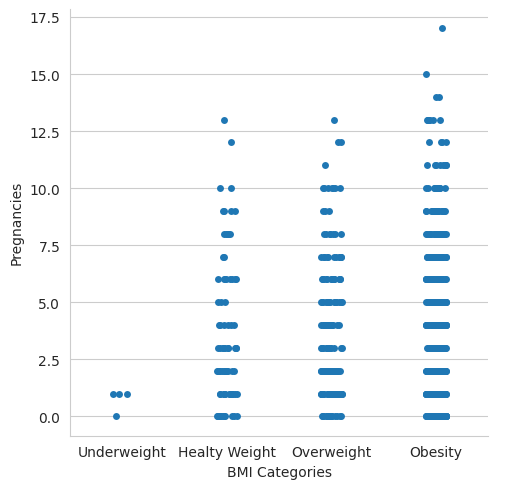

In [26]:
sns.catplot(df_updated,x="BMI Categories", y="Pregnancies")

plt.show()

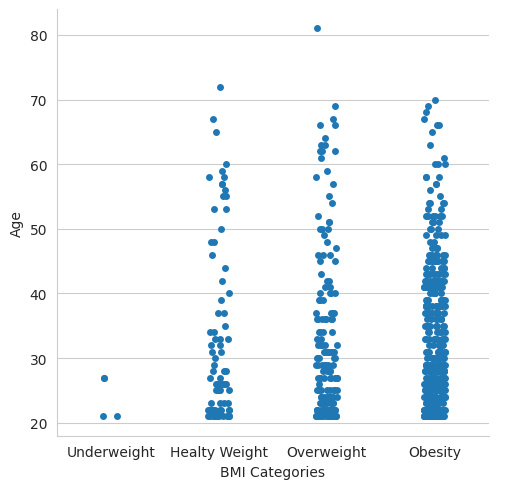

In [27]:
sns.catplot(df_updated,x="BMI Categories", y="Age")

plt.show()

Just to confirm something that is very predictable, I wanted to draw regplot.

<Axes: xlabel='Age', ylabel='Pregnancies'>

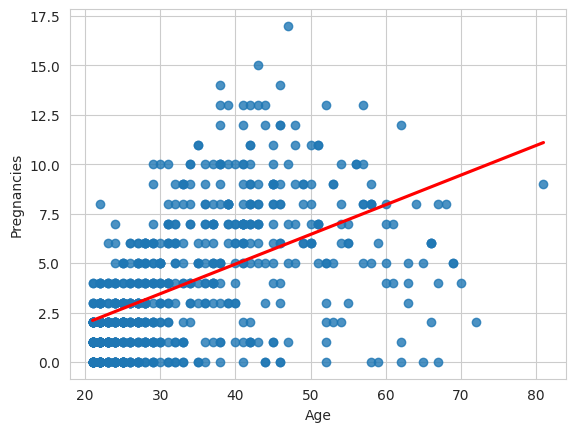

In [28]:
sns.regplot(df_updated,x="Age", y= "Pregnancies",line_kws={"color":"red"},ci=False)

  Let's see how Glucose and Blood Pressure are related.

<Axes: xlabel='BloodPressure', ylabel='Glucose'>

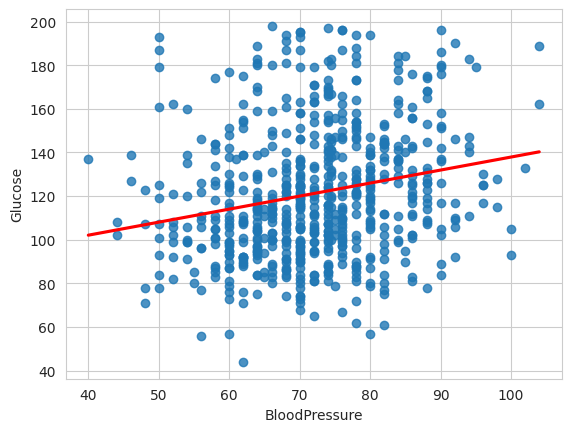

In [29]:
sns.regplot(df_updated,x="BloodPressure", y= "Glucose",line_kws={"color":"red"},ci=False)

Let's draw a barplot to see how blood pressure varies over BMI Categories.

<ipython-input-30-dce9b5ccb1dd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BMI Categories', y='BloodPressure', data=cut_price_mean, palette='husl')


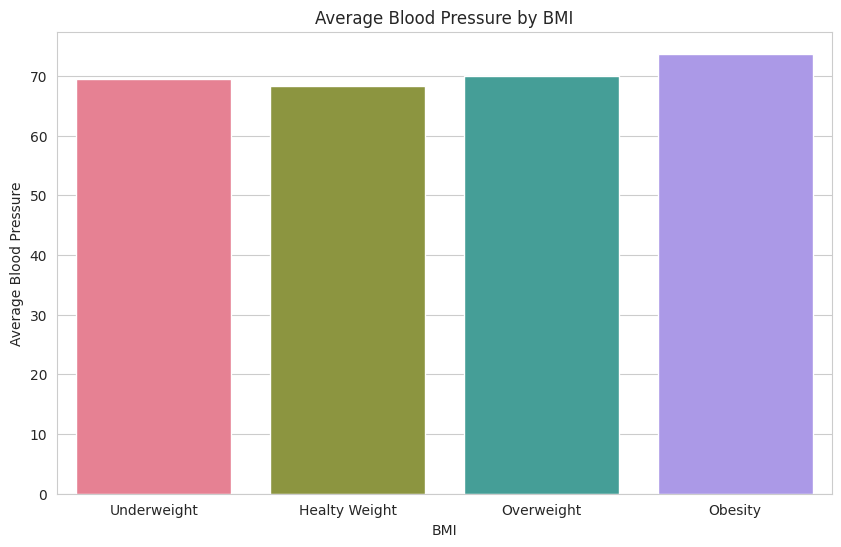

In [30]:
cut_price_mean = df_updated.groupby('BMI Categories')['BloodPressure'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x='BMI Categories', y='BloodPressure', data=cut_price_mean, palette='husl')

plt.title('Average Blood Pressure by BMI')
plt.xlabel('BMI')
plt.ylabel('Average Blood Pressure')

plt.show()

Let's see how BMI categories and Glucose related over Age Groups.

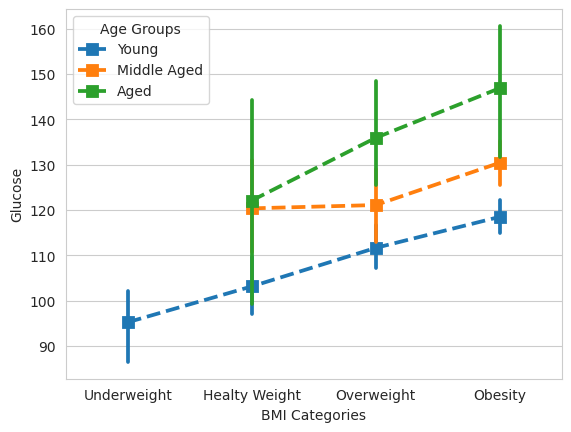

In [31]:
sns.pointplot(data=df_updated, x= "BMI Categories", y = "Glucose", hue="Age Groups",markers=["s","s","s"],linestyles=["--","--","--"])
plt.show()

In [32]:
df_updated["Age Groups"].unique()

['Middle Aged', 'Young', 'Aged']
Categories (3, object): ['Young' < 'Middle Aged' < 'Aged']

Altough I plotted some of catplots, since they are not telling too much I want to replot them but in volin plots.

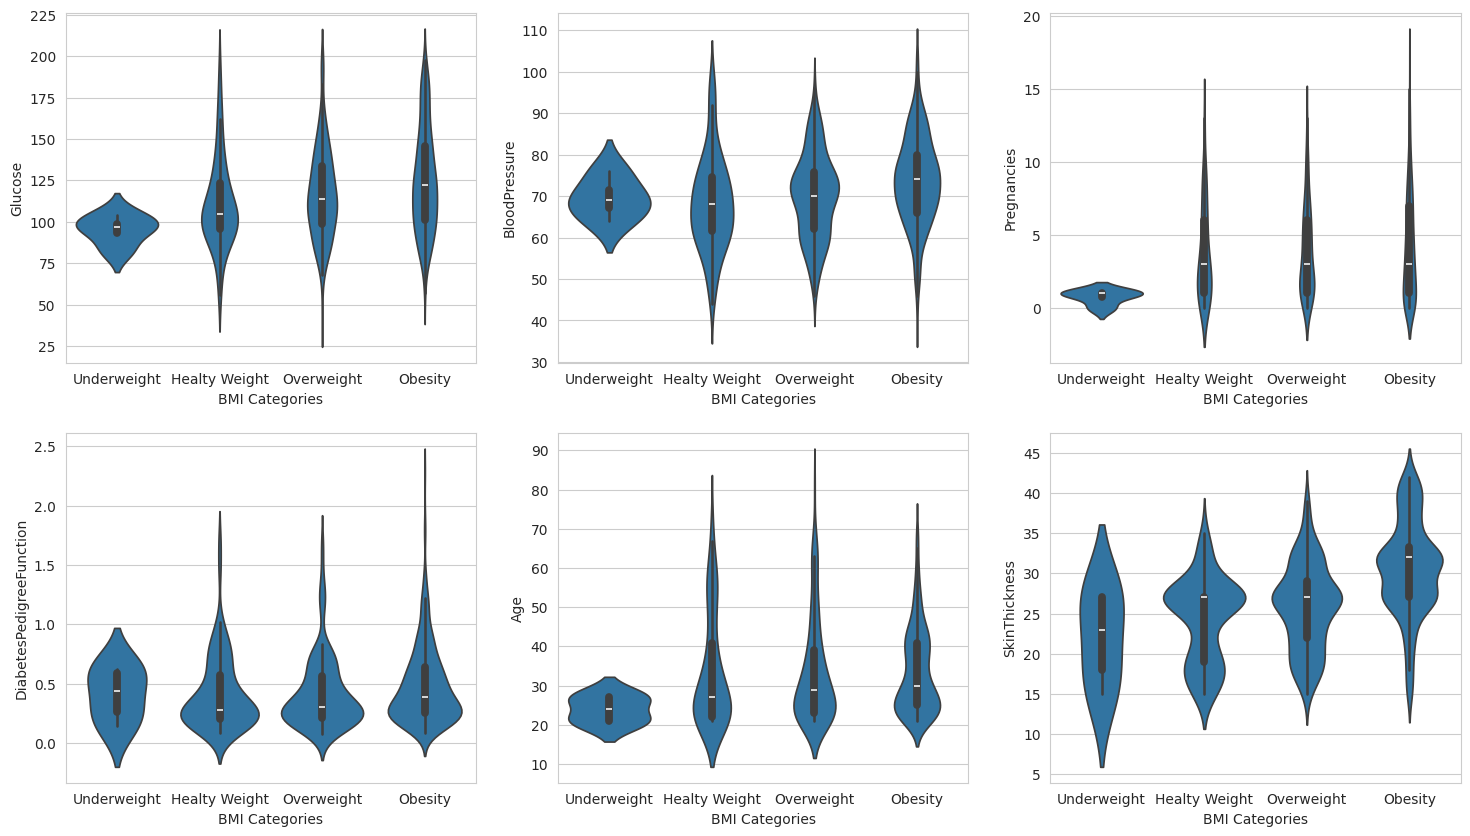

In [33]:
plt.figure(figsize=(18,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.violinplot(y='Glucose',x="BMI Categories",data=df_updated)
plt.subplot(2,3,2)
sns.violinplot(y='BloodPressure',x="BMI Categories",data=df_updated)
plt.subplot(2,3,3)
sns.violinplot(y='Pregnancies',x="BMI Categories",data=df_updated)
plt.subplot(2,3,4)
sns.violinplot(y="DiabetesPedigreeFunction",x="BMI Categories",data=df_updated)
plt.subplot(2,3,5)
sns.violinplot(y='Age',x="BMI Categories",data=df_updated)
plt.subplot(2,3,6)
sns.violinplot(y='SkinThickness',x="BMI Categories",data=df_updated)
plt.show()

Now drawing the pairplots.

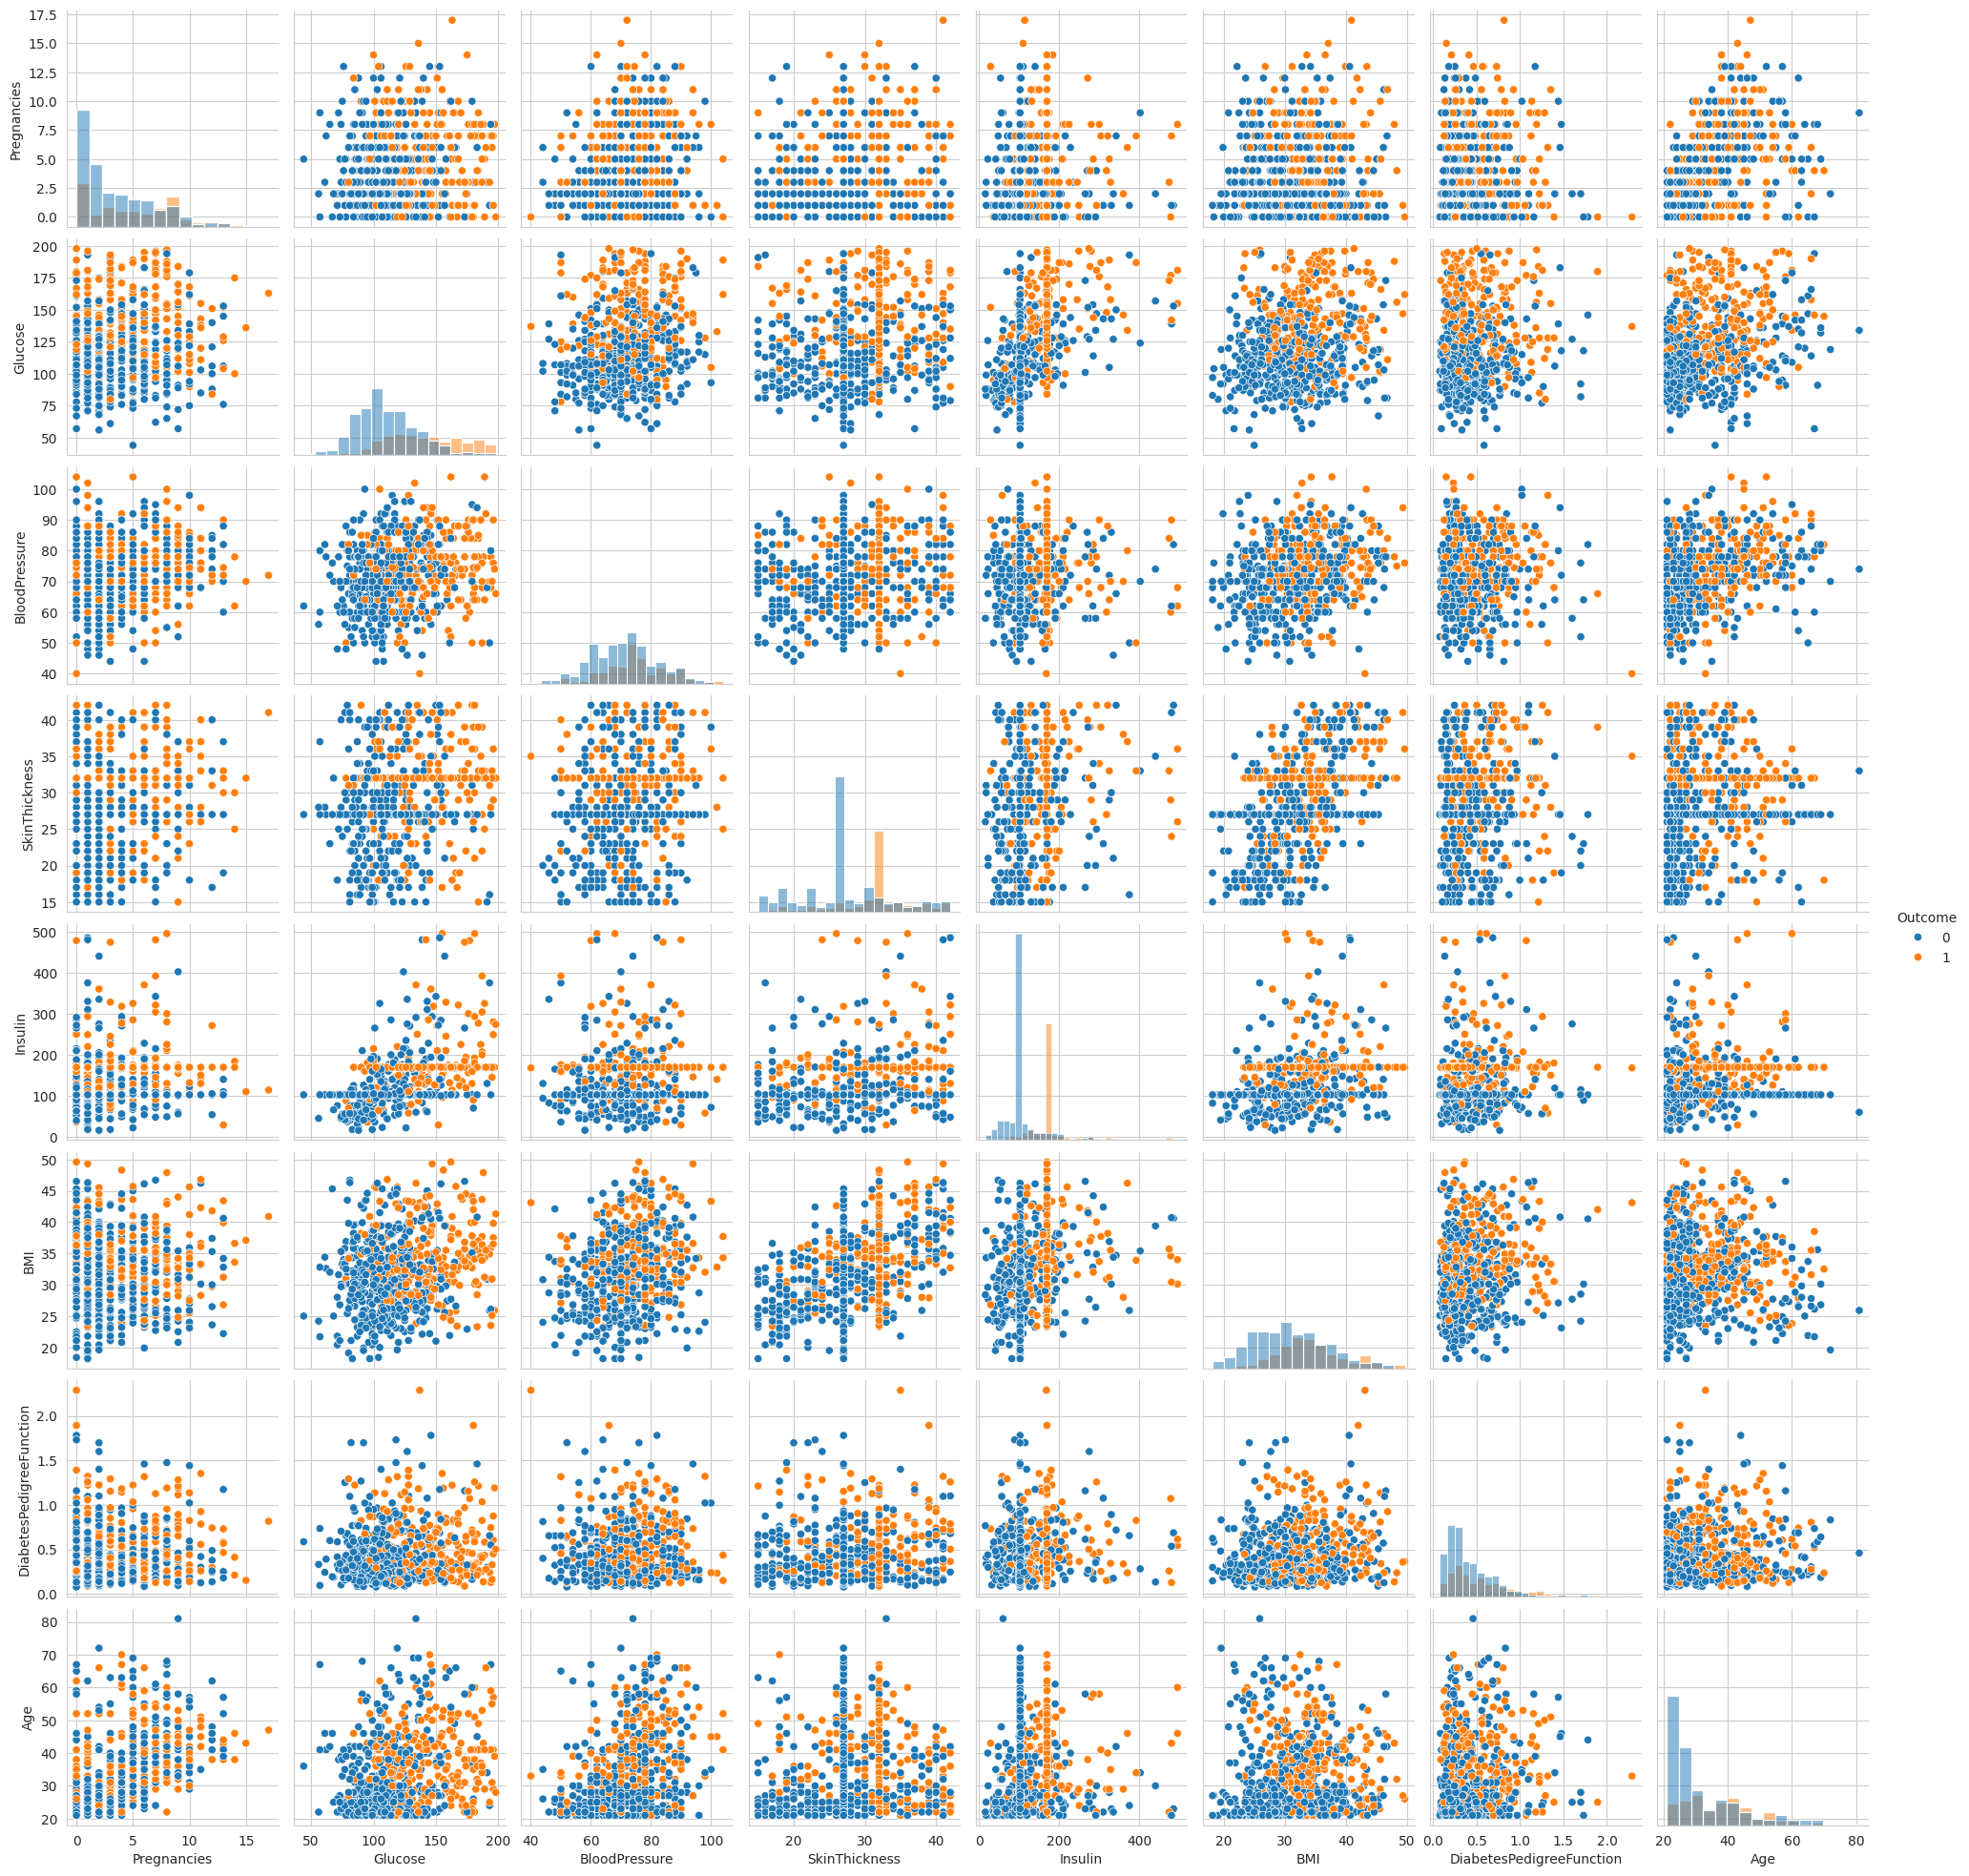

In [34]:
sns.pairplot(data = df_updated, hue = "Outcome", diag_kind = "hist" )

## **PART 3 - Machine Learning**


Import libraries for ML

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from scipy.stats import norm
from sklearn.model_selection import GridSearchCV


To work better on ML process I will print the head of the dataset. So when I have question marks I turn back and see the structure of the DF.

In [36]:
df_updated.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome   Age Groups BMI Categories  \
0                     0.627   50        1  Middle Aged        Obesity   
1                     0.351   31        0  Middle Aged     Overweight   
2                     0.672   32        1  Middle Aged  Healty Weight   
3                     0.167   21        0        Young     Overweight   
4                     2.288   33        1  Middle Aged        Obesity   

  Blood Pressure Cat  
0            low mid  
1            low mid  
2            low mid  
3            low mid  
4                low

Creating X and y datas. And splitting them into test and train parts with random state 302.

In [37]:
X = df_updated[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
y = df_updated["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=302)

Scale datas.

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Apply some methods and find their test accuraries.

In [39]:
classification_methods = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, clf in classification_methods.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {round(accuracy,4)}")


Logistic Regression Accuracy: 0.7444
KNN Accuracy: 0.812
Decision Tree Accuracy: 0.8647
Random Forest Accuracy: 0.8647
SVC Accuracy: 0.8271
Gradient Boosting Accuracy: 0.8571


Apply hyperparameter tuning to improve the performance of the classification methods I used above and find the best parameters.

In [40]:
param_grids = {
    'LogisticRegression': {'C': [0.01, 0.1, 1, 10, 100]},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7, 9]},
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'SVC': {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5]
    }
}

lr_classifier = LogisticRegression(random_state=42)
knn_classifier = KNeighborsClassifier()
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
svc_classifier = SVC(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)

classifiers = [
    ('LogisticRegression', lr_classifier),
    ('KNeighborsClassifier', knn_classifier),
    ('DecisionTreeClassifier', dt_classifier),
    ('RandomForestClassifier', rf_classifier),
    ('SVC', svc_classifier),
    ('GradientBoostingClassifier', gb_classifier)
]

best_models = []

for name, clf in classifiers:
    print(f"Working on {name}")

    grid_search = GridSearchCV(estimator=clf, param_grid=param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    print("Best Score:", grid_search.best_score_)
    print("Best Parameters:", grid_search.best_params_)

    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    y_pred_test = best_model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print("Test Accuracy:", test_accuracy)
    print("-" * 15)


Working on LogisticRegression
Best Score: 0.8219586702605571
Best Parameters: {'C': 1}
Test Accuracy: 0.7443609022556391
---------------
Working on KNeighborsClassifier
Best Score: 0.8370889487870619
Best Parameters: {'n_neighbors': 3}
Test Accuracy: 0.8120300751879699
---------------
Working on DecisionTreeClassifier
Best Score: 0.8693261455525606
Best Parameters: {'max_depth': None, 'min_samples_split': 2}
Test Accuracy: 0.8571428571428571
---------------
Working on RandomForestClassifier
Best Score: 0.9128301886792454
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.8571428571428571
---------------
Working on SVC
Best Score: 0.8617610062893082
Best Parameters: {'C': 1, 'kernel': 'rbf'}
Test Accuracy: 0.8270676691729323
---------------
Working on GradientBoostingClassifier
Best Score: 0.907079964061096
Best Parameters: {'max_depth': 3, 'n_estimators': 50}
Test Accuracy: 0.8721804511278195
---------------


Evaluating their performance on the validation dataset using appropriate metrics (e.g., RMS, accuracy, precision, recall, F1 score, and confusion matrix)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


for name, model in classification_methods.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Precision: {precision:.4f}")
    print(f"{name} Recall: {recall:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")
    print(f"{name} Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n")

Logistic Regression Accuracy: 0.7444
Logistic Regression Precision: 0.7371
Logistic Regression Recall: 0.7444
Logistic Regression F1 Score: 0.7378
Logistic Regression Confusion Matrix:
 [[74 13]
 [21 25]]

KNN Accuracy: 0.8120
KNN Precision: 0.8111
KNN Recall: 0.8120
KNN F1 Score: 0.8115
KNN Confusion Matrix:
 [[75 12]
 [13 33]]

Decision Tree Accuracy: 0.8647
Decision Tree Precision: 0.8636
Decision Tree Recall: 0.8647
Decision Tree F1 Score: 0.8639
Decision Tree Confusion Matrix:
 [[79  8]
 [10 36]]

Random Forest Accuracy: 0.8647
Random Forest Precision: 0.8637
Random Forest Recall: 0.8647
Random Forest F1 Score: 0.8622
Random Forest Confusion Matrix:
 [[81  6]
 [12 34]]

SVC Accuracy: 0.8271
SVC Precision: 0.8280
SVC Recall: 0.8271
SVC F1 Score: 0.8275
SVC Confusion Matrix:
 [[75 12]
 [11 35]]

Gradient Boosting Accuracy: 0.8571
Gradient Boosting Precision: 0.8563
Gradient Boosting Recall: 0.8571
Gradient Boosting F1 Score: 0.8540
Gradient Boosting Confusion Matrix:
 [[81  6]
 [13 

Performing cross-validation to ensure robustness.

In [42]:
from sklearn.model_selection import cross_val_score

cv_results = {}
for name, model in classification_methods.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cv_results[name] = scores
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Logistic Regression Cross-Validation Accuracy: 0.8220 ± 0.0204
KNN Cross-Validation Accuracy: 0.8334 ± 0.0093
Decision Tree Cross-Validation Accuracy: 0.8693 ± 0.0152
Random Forest Cross-Validation Accuracy: 0.9015 ± 0.0166
SVC Cross-Validation Accuracy: 0.8618 ± 0.0140
Gradient Boosting Cross-Validation Accuracy: 0.9033 ± 0.0394


Consider issues such as class imbalance and interpret the impact on the model. There is a model called SMOTE, I am not very familiar with this name. This model let us handling class imbalance and improve the models. However in this case, instead of improving the results, it ruins the existing results.

In [43]:
from imblearn.over_sampling import SMOTE
from collections import Counter

best_models = []

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f'Original dataset shape: {Counter(y_train)}')
print(f'Resampled dataset shape: {Counter(y_train_resampled)}')

for name, clf in classifiers:
    print(f"Working on {name}")

    grid_search = GridSearchCV(estimator=clf, param_grid=param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)

    print("Best Score:", grid_search.best_score_)
    print("Best Parameters:", grid_search.best_params_)

    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    y_pred_test = best_model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print("Test Accuracy:", test_accuracy)

    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_test))
    print("-" * 15)

Original dataset shape: Counter({0: 344, 1: 184})
Resampled dataset shape: Counter({0: 344, 1: 344})
Working on LogisticRegression
Best Score: 0.8518036602136888
Best Parameters: {'C': 1}
Test Accuracy: 0.7744360902255639
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        87
           1       0.65      0.74      0.69        46

    accuracy                           0.77       133
   macro avg       0.75      0.77      0.76       133
weighted avg       0.78      0.77      0.78       133

Confusion Matrix:
[[69 18]
 [12 34]]
---------------
Working on KNeighborsClassifier
Best Score: 0.8838252406643393
Best Parameters: {'n_neighbors': 3}
Test Accuracy: 0.7744360902255639
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        87
           1       0.64      0.78      0.71        46

    accuracy                           0.77       133
 

Drawing feature importances.

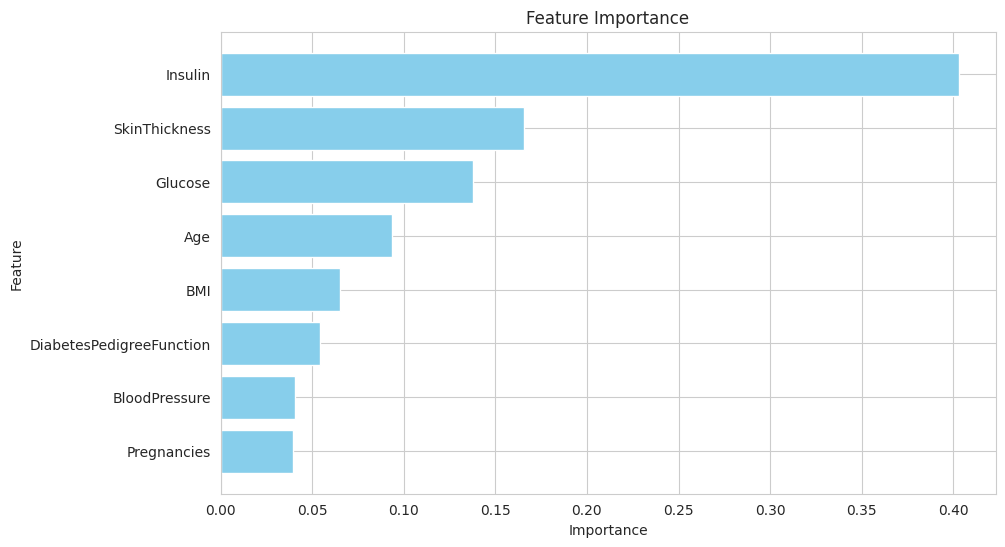

In [44]:
feature_importances = best_models[3].feature_importances_

feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance')

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

## **PART 4 - Conclusions**



*  First of, the data contains only numerical columns so it was very easy to handle.

*   When handling misssing data's I tried to different methods, I only keeped one of them. I mentioned two of them when doing that part. Second one (The one used in most current version) give better results.

*   Since I handled the missing data with the second version SMOTE gave worse results.

*   Hyperparameter tuning with GridSearchCV helped me to improve my test accurary.

*    The plolts I have been plotted helped me to understand data better and give me more insight information.


*   I will return to missing data handling problem, If I were to chose filling the missing data with filling missing datas with the mean of nonmissing datas, Most of the Machine Learning algorithms would perform poorly, I tried both of them and the one I used performed better.


*   So If one wants to build a reliable machine learning model, S/he should have done preprocessing well so that model accurary rise significantly.


*   When doing EDA part, although it is hard to understand when looking to the data directly, one can plot several graphs and understand the distrubition of dall.ta well. So plotting some graphs helps us to understand the structure of the data we

*   If there was no machine learning algortithm were discovered and somehow I wanted to do ML, Looking the data and plots itself, especially heatmap-correlation plot would let me to determine what futures be the most important futures etc. However it wouldn't be so accurate.

*   By looking future importances, It is easily seen that most important future is Insulin by far, It could have been predictable since no one would give insulin to healthy person.


*   When working on this dataset I also learnt that however the missing values don't seen in this data set as NaN. There always is another way. And without any hesitation I can say no data set is perfect at the beginning but we can rearrange them, cut some of the values, outliers and we get them into workable form.

*   It will go out of context but I need to mention that: However we have an idea about how we will write the code, there always exists another ideas and we must consider them. May be our code would be cleaner may be there exist better  ways etc. So if one wants to involved in data science, s/he should always open to new ideas and new perspectives.

